### We begin with boilerplate:

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
from IPython.display import HTML
plt.rcParams["figure.figsize"] = [12, 5]

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

In [4]:
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO)

# Covid epidemic simulator

In [5]:
from codit.disease import Covid
from codit.outbreak import Outbreak
from codit.population.covid import PersonCovid
import codit.society as society
import codit.config

from codit.population.networks.city import CityPopulation
from codit.population.networks.city_config.city_cfg import city_paras
CITY_OBSERVE = 'Leeds'
POP_SIZE = 50000 #city_paras[CITY_OBSERVE]['population']

### Baseline config of the simulation

In [6]:
codit.config.print_baseline_config()

DAILY_TEST_CAPACITY_PER_HEAD 0.0075
DAYS_BEFORE_INFECTIOUS 4
DAYS_INFECTIOUS_TO_SYMPTOMS 2
DAYS_OF_SYMPTOMS 5
DURATION_OF_ISOLATION 10
MEAN_NETWORK_SIZE 9.0
PROB_APPLY_FOR_TEST_IF_SYMPTOMS 0.75
PROB_GET_TEST_IF_TRACED 0.75
PROB_INFECT_IF_TOGETHER_ON_A_DAY 0.025
PROB_ISOLATE_IF_SYMPTOMS 0.75
PROB_ISOLATE_IF_TESTPOS 0.3
PROB_ISOLATE_IF_TRACED 0.3
PROB_NON_C19_SYMPTOMS_PER_DAY 0.01
PROB_SYMPTOMATIC 0.6
PROB_TEST_IF_REQUESTED 1
PROB_TRACING_GIVEN_CONTACT 0.6000000000000001
SIMULATOR_PERIODS_PER_DAY 1
TEST_DAYS_ELAPSED 1
_PROPORTION_OF_INFECTED_WHO_GET_TESTED 0.44999999999999996
_TARGET_R0 1.4


We are going to work with Leeds poluation as an example

In [7]:
pop = CityPopulation(POP_SIZE, society.Society(), person_type=PersonCovid)

2021-02-15 18:37:01,768 INFO:Building a set of 20000 households from which to build a population
2021-02-15 18:37:03,139 INFO:There are 20000 households generated for accommodation buildings
2021-02-15 18:37:03,267 INFO:19633 households of mean size 2.55
2021-02-15 18:37:03,299 INFO:Only putting children >12 years old into classrooms.
2021-02-15 18:37:03,307 INFO:124 classrooms of mean size 30.01
2021-02-15 18:37:03,329 INFO:6 care_homes of mean size 104.00
2021-02-15 18:37:03,470 INFO:5886 workplaces of mean size 5.66
2021-02-15 18:37:03,473 INFO:Adding 25649 permanent contact groups
2021-02-15 18:37:03,479 INFO:Adding 2500 ephemeral contact pairs


Randomly, we put them into fixed and overlapping social groupings, where each person has a small network.

In [8]:
nets = [len(p.contacts) for p in pop.people]

In [9]:
np.mean(nets)

12.68636

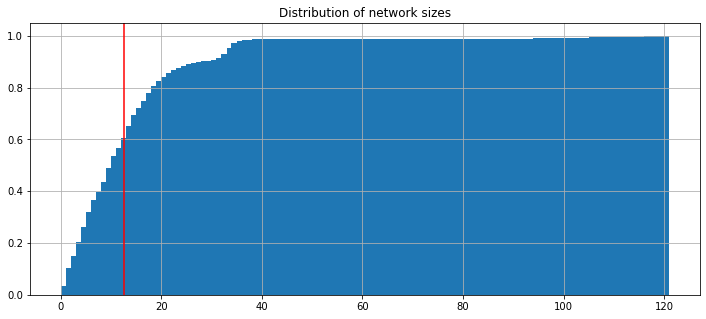

In [10]:
plt.hist(nets, cumulative=True, density=True, bins=2000)
plt.title('Distribution of network sizes')
plt.axvline(np.mean(nets), color='r')
plt.grid()

### Finally ready to simulate:

We will place the population that we have created, into various settings and societies in the upcoming simulations

In [11]:
SHOW_HEATMAP = True
IS_HTML5 = False
PREVALENCE = 1/560 * 4
SCALE_SETTINGS = dict(n_days = 201, pop_size = POP_SIZE, seed_size = int(POP_SIZE*PREVALENCE), population=pop, show_heatmap = SHOW_HEATMAP)
SCALE_SETTINGS

{'n_days': 201,
 'pop_size': 50000,
 'seed_size': 357,
 'population': <codit.population.networks.city.CityPopulation at 0x7fc674eb6a60>,
 'show_heatmap': True}

Our baseline simulation is of a runaway infection.

In [12]:
f"We start with {int(POP_SIZE*PREVALENCE)} people infected in a population of {POP_SIZE}."

'We start with 357 people infected in a population of 50000.'

We begin by studying a society where people don't know whether or how to self-isolate:

In [13]:
s_basic = society.Society(config=dict(PROB_ISOLATE_IF_SYMPTOMS = 0))
o_basic = Outbreak(s_basic, Covid(), **SCALE_SETTINGS).simulate()

2021-02-15 18:37:08,543 WARNING:Using a pre-existing population - does it have the right network structure?
2021-02-15 18:37:09,440 INFO:Day 1, prop infected is 0.01, prop infectious is 0.0050
2021-02-15 18:37:14,354 INFO:Day 51, prop infected is 0.42, prop infectious is 0.0821
2021-02-15 18:37:19,018 INFO:Day 101, prop infected is 0.56, prop infectious is 0.0028
2021-02-15 18:37:23,350 INFO:Day 151, prop infected is 0.56, prop infectious is 0.0000
2021-02-15 18:37:27,320 INFO:Day 201, prop infected is 0.56, prop infectious is 0.0000


2021-02-15 18:37:27,442 INFO: Realized R0 of early infections is 1.56
2021-02-15 18:37:27,443 INFO: 55.8 percent of the proportion was infected during the epidemic


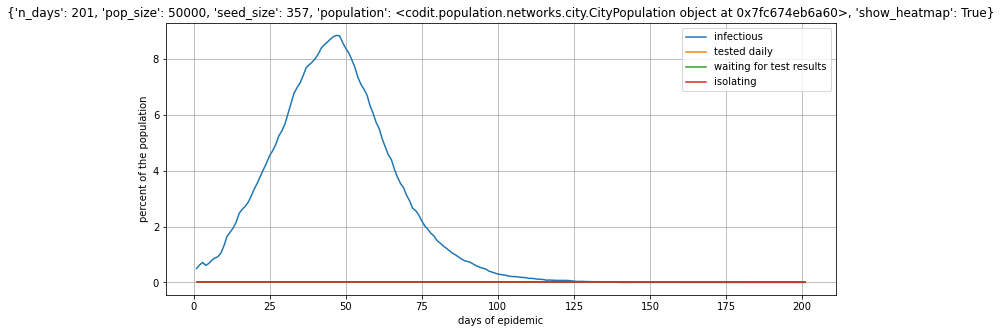

In [14]:
o_basic.plot(title=str(SCALE_SETTINGS))

Lets put that on a log scale:

2021-02-15 18:37:27,724 INFO: Realized R0 of early infections is 1.56
2021-02-15 18:37:27,725 INFO: 55.8 percent of the proportion was infected during the epidemic


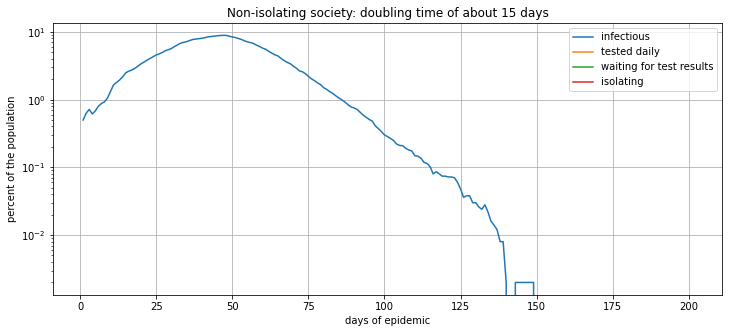

In [15]:
o_basic.plot(logy=True, title='Non-isolating society: doubling time of about 15 days')

In [16]:
HTML(o_basic.outbreak_visualise(IS_HTML5))

2021-02-15 18:37:28,319 INFO:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


Next, suppose that people know to isolate if they show symptoms, and 75% do so - this is similar to what is going on in the UK now:

In [17]:
s_isolate = society.Society(config=dict(PROB_ISOLATE_IF_SYMPTOMS = 0.75))
o_isolate = Outbreak(s_isolate, Covid(), **SCALE_SETTINGS).simulate()

2021-02-15 18:37:32,241 WARNING:Using a pre-existing population - does it have the right network structure?
2021-02-15 18:37:33,107 INFO:Day 1, prop infected is 0.01, prop infectious is 0.0050
2021-02-15 18:37:38,053 INFO:Day 51, prop infected is 0.11, prop infectious is 0.0185
2021-02-15 18:37:42,521 INFO:Day 101, prop infected is 0.22, prop infectious is 0.0130
2021-02-15 18:37:46,832 INFO:Day 151, prop infected is 0.27, prop infectious is 0.0031
2021-02-15 18:37:51,185 INFO:Day 201, prop infected is 0.27, prop infectious is 0.0002


2021-02-15 18:37:51,453 INFO: Realized R0 of early infections is 1.12
2021-02-15 18:37:51,453 INFO: 27.2 percent of the proportion was infected during the epidemic


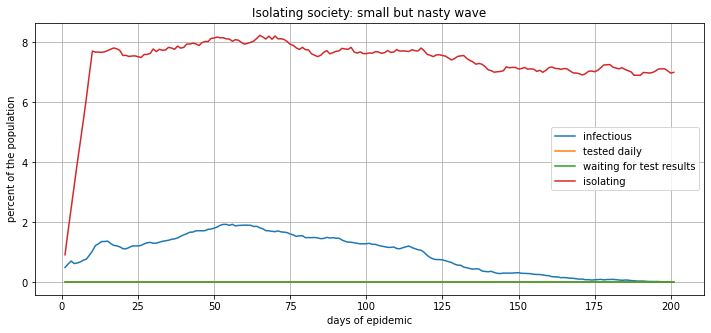

In [18]:
o_isolate.plot(title='Isolating society: small but nasty wave')

In [19]:
HTML(o_isolate.outbreak_visualise(IS_HTML5))

2021-02-15 18:37:51,686 INFO:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


So, now we can add testing:
 * initially, here, lets suppose that positive test results are just ignored, while -ve results let people out of isolation:

In [20]:
s_testignored = society.TestingSociety(config=dict(PROB_ISOLATE_IF_TESTPOS=0))
o_testignored = Outbreak(s_testignored, Covid(), **SCALE_SETTINGS).simulate()

2021-02-15 18:37:57,213 WARNING:Using a pre-existing population - does it have the right network structure?
2021-02-15 18:37:58,153 INFO:Day 1, prop infected is 0.01, prop infectious is 0.0051
2021-02-15 18:38:04,314 INFO:Day 51, prop infected is 0.16, prop infectious is 0.0301
2021-02-15 18:38:10,142 INFO:Day 101, prop infected is 0.29, prop infectious is 0.0112
2021-02-15 18:38:15,085 INFO:Day 151, prop infected is 0.32, prop infectious is 0.0023
2021-02-15 18:38:20,197 INFO:Day 201, prop infected is 0.33, prop infectious is 0.0003


2021-02-15 18:38:20,331 INFO: Realized R0 of early infections is 1.26
2021-02-15 18:38:20,332 INFO: 33.0 percent of the proportion was infected during the epidemic


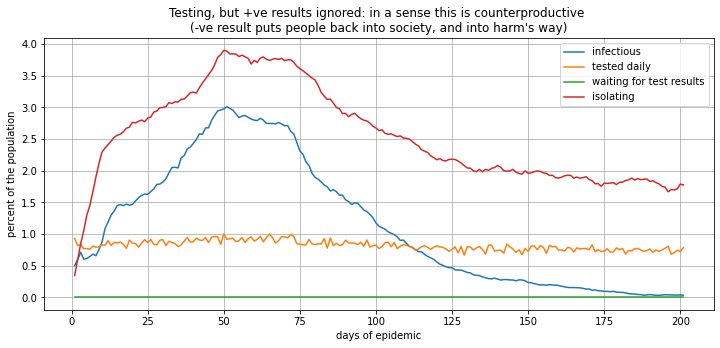

In [21]:
o_testignored.plot(title="Testing, but +ve results ignored: in a sense this is counterproductive \n"
                         "(-ve result puts people back into society, and into harm's way)")

In [22]:
HTML(o_testignored.outbreak_visualise(IS_HTML5))

2021-02-15 18:38:20,602 INFO:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


 * Now suppose that people respond to test results, some of the time:

In [23]:
o_test = Outbreak(society.TestingSociety(), Covid(), **SCALE_SETTINGS).simulate()

2021-02-15 18:38:26,610 WARNING:Using a pre-existing population - does it have the right network structure?
2021-02-15 18:38:27,643 INFO:Day 1, prop infected is 0.01, prop infectious is 0.0054
2021-02-15 18:38:33,836 INFO:Day 51, prop infected is 0.12, prop infectious is 0.0184
2021-02-15 18:38:39,131 INFO:Day 101, prop infected is 0.22, prop infectious is 0.0111
2021-02-15 18:38:43,905 INFO:Day 151, prop infected is 0.26, prop infectious is 0.0020
2021-02-15 18:38:48,553 INFO:Day 201, prop infected is 0.26, prop infectious is 0.0004


2021-02-15 18:38:48,669 INFO: Realized R0 of early infections is 1.24
2021-02-15 18:38:48,670 INFO: 26.2 percent of the proportion was infected during the epidemic


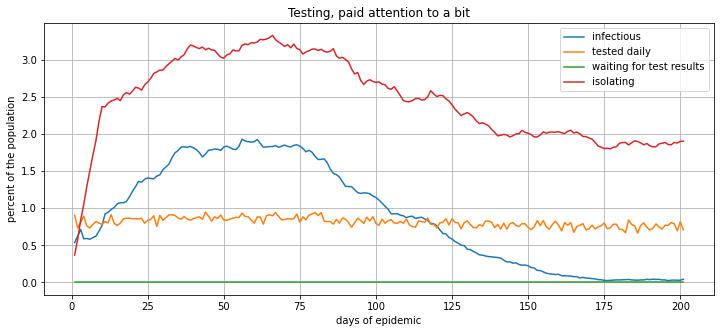

In [24]:
o_test.plot(title="Testing, paid attention to a bit")

In [25]:
HTML(o_test.outbreak_visualise(IS_HTML5))

2021-02-15 18:38:48,901 INFO:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


We add contact-tracing and isolation:

In [26]:
o_test_trace = Outbreak(society.TestingTracingSociety(), Covid(), **SCALE_SETTINGS).simulate()

2021-02-15 18:38:54,509 WARNING:Using a pre-existing population - does it have the right network structure?
2021-02-15 18:38:55,483 INFO:Day 1, prop infected is 0.01, prop infectious is 0.0053
2021-02-15 18:39:01,881 INFO:Day 51, prop infected is 0.06, prop infectious is 0.0047
2021-02-15 18:39:07,515 INFO:Day 101, prop infected is 0.08, prop infectious is 0.0019
2021-02-15 18:39:12,932 INFO:Day 151, prop infected is 0.08, prop infectious is 0.0004
2021-02-15 18:39:17,588 INFO:Day 201, prop infected is 0.08, prop infectious is 0.0000


2021-02-15 18:39:17,694 INFO: Realized R0 of early infections is 0.97
2021-02-15 18:39:17,695 INFO: 8.3 percent of the proportion was infected during the epidemic


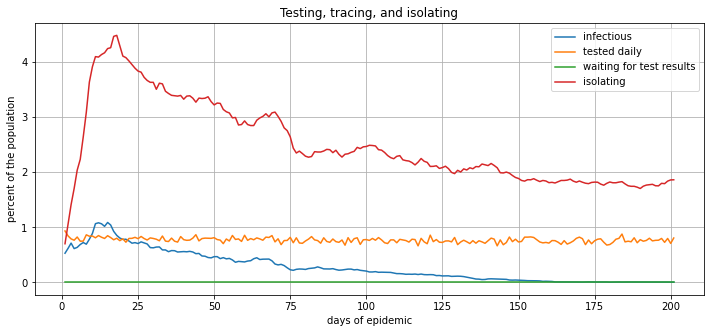

In [27]:
o_test_trace.plot(title='Testing, tracing, and isolating', secondary_y=['prop_infected'])

In [28]:
HTML(o_test_trace.outbreak_visualise(IS_HTML5))

2021-02-15 18:39:17,927 INFO:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


UK society, however, is characterized by testing bottlenecks:

In [29]:
import codit.society.alternatives
o_UK = Outbreak(society.alternatives.UKSociety(), Covid(), **SCALE_SETTINGS).simulate()

2021-02-15 18:39:23,671 WARNING:Using a pre-existing population - does it have the right network structure?
2021-02-15 18:39:24,620 INFO:Day 1, prop infected is 0.01, prop infectious is 0.0051
2021-02-15 18:39:29,778 INFO:Day 51, prop infected is 0.05, prop infectious is 0.0037
2021-02-15 18:39:35,133 INFO:Day 101, prop infected is 0.07, prop infectious is 0.0042
2021-02-15 18:39:41,448 INFO:Day 151, prop infected is 0.11, prop infectious is 0.0048
2021-02-15 18:39:46,973 INFO:Day 201, prop infected is 0.12, prop infectious is 0.0009


2021-02-15 18:39:47,079 INFO: Realized R0 of early infections is 0.93
2021-02-15 18:39:47,080 INFO: 12.2 percent of the proportion was infected during the epidemic


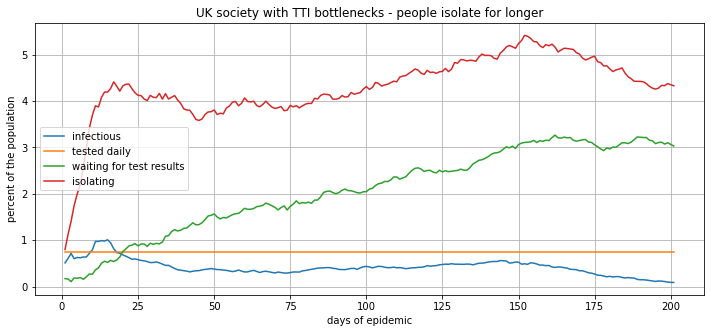

In [30]:
o_UK.plot(title='UK society with TTI bottlenecks - people isolate for longer')

In [31]:
HTML(o_UK.outbreak_visualise(IS_HTML5))

2021-02-15 18:39:47,328 INFO:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


In [32]:
o_contact_test = Outbreak(society.ContactTestingSociety(), Covid(), **SCALE_SETTINGS).simulate()

2021-02-15 18:39:52,879 WARNING:Using a pre-existing population - does it have the right network structure?
2021-02-15 18:39:53,896 INFO:Day 1, prop infected is 0.01, prop infectious is 0.0052
2021-02-15 18:40:00,577 INFO:Day 51, prop infected is 0.10, prop infectious is 0.0117
2021-02-15 18:40:06,529 INFO:Day 101, prop infected is 0.16, prop infectious is 0.0068
2021-02-15 18:40:12,275 INFO:Day 151, prop infected is 0.19, prop infectious is 0.0025
2021-02-15 18:40:17,230 INFO:Day 201, prop infected is 0.20, prop infectious is 0.0011


2021-02-15 18:40:17,343 INFO: Realized R0 of early infections is 1.02
2021-02-15 18:40:17,343 INFO: 19.9 percent of the proportion was infected during the epidemic


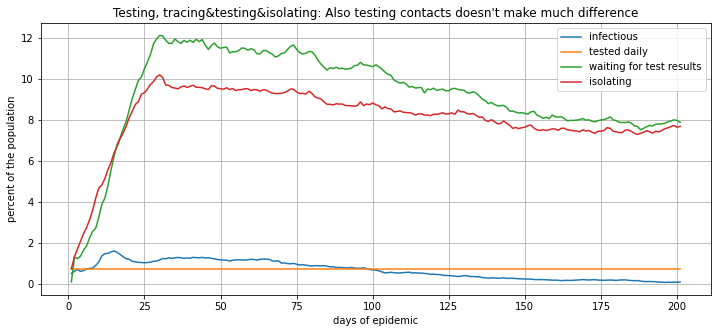

In [33]:
o_contact_test.plot(title="Testing, tracing&testing&isolating: "
                    "Also testing contacts doesn't make much difference", 
                    secondary_y=['prop_infected'])

In [34]:
HTML(o_contact_test.outbreak_visualise(IS_HTML5))

2021-02-15 18:40:17,563 INFO:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


In [35]:
infector_nets = [len(p.infector.contacts) for p in pop.people if p.infector]

In [36]:
infected_nets = [len(p.contacts) for p in pop.people if p.infected]

In [37]:
def most_connected_infector(guy):
    if guy.infector is None:
        raise NotImplementedError
    return max([len(i.contacts) for i in guy.chain() if i is not guy]) 

max_contacts_chain = [most_connected_infector(person)
                      for person in pop.people 
                      if person.infector is not None]

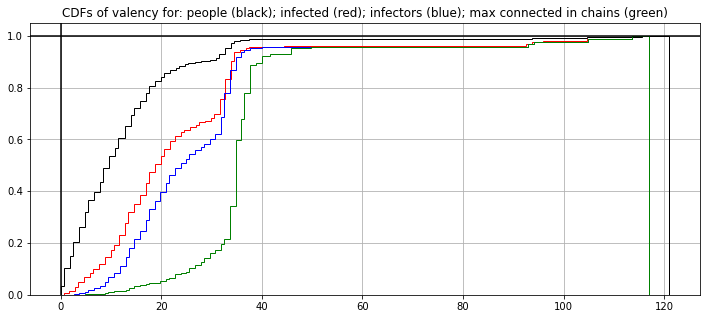

In [38]:
opts = dict(cumulative=True, bins=200, density=True, histtype='step')

plt.hist(nets, color='k', **opts)
plt.hist(infected_nets, color='r', **opts)
plt.hist(infector_nets, color='b', **opts)
plt.hist(max_contacts_chain, color='g', **opts)

plt.title("CDFs of valency for: people (black); infected (red); infectors (blue); max connected in chains (green)")
plt.axhline(1, color='k'); plt.axvline(0, color='k')
plt.grid()